In [13]:
import pandas as pd

df= pd.read_csv('~/glioma+grading+clinical+and+mutation+features+dataset/TCGA_GBM_LGG_Mutations_all.csv')
df

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,TCGA-GBM,TCGA-19-5959,Female,77 years 325 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
858,GBM,TCGA-GBM,TCGA-16-0846,Male,85 years 65 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
859,GBM,TCGA-GBM,TCGA-28-1746,Female,77 years 178 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
860,GBM,TCGA-GBM,TCGA-32-2491,Male,63 years 121 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


<AxesSubplot:>

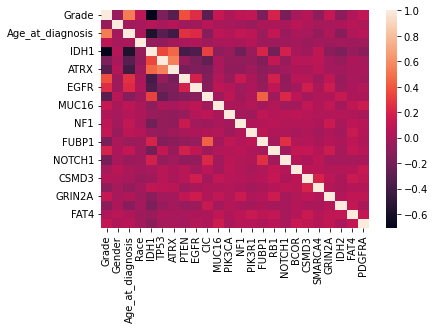

In [16]:
import seaborn as sns
sns.heatmap(df.corr())



In [11]:
for i in df.columns:
    print(df[i].value_counts())

LGG    499
GBM    363
Name: Grade, dtype: int64
TCGA-LGG    499
TCGA-GBM    363
Name: Project, dtype: int64
TCGA-DU-8164    1
TCGA-19-1786    1
TCGA-28-5219    1
TCGA-14-1455    1
TCGA-41-2575    1
               ..
TCGA-FG-6689    1
TCGA-HT-8013    1
TCGA-HT-A616    1
TCGA-DU-7008    1
TCGA-06-2557    1
Name: Case_ID, Length: 862, dtype: int64
Male      499
Female    359
--          4
Name: Gender, dtype: int64
--                   5
64 years 298 days    3
38 years 203 days    2
52 years 156 days    2
30 years 32 days     2
                    ..
36 years 73 days     1
41 years 314 days    1
57 years 201 days    1
52 years 243 days    1
76 years 221 days    1
Name: Age_at_diagnosis, Length: 838, dtype: int64
Glioblastoma                     360
Astrocytoma, anaplastic          129
Mixed glioma                     128
Oligodendroglioma, NOS           108
Oligodendroglioma, anaplastic     75
Astrocytoma, NOS                  58
--                                 4
Name: Primary_Diagnosi

In [7]:
df['Gender'].unique()

array(['Male', 'Female', '--'], dtype=object)

In [10]:
df['Gender'].value_counts()
    

Male      499
Female    359
--          4
Name: Gender, dtype: int64

In [15]:
#clean dataset

df= pd.read_csv('~/glioma+grading+clinical+and+mutation+features+dataset/TCGA_InfoWithGrade.csv')
df



,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1,77.89,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
835,1,0,85.18,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
836,1,1,77.49,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
837,1,0,63.33,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


1. **EDA, cleanup, graphs**
2. **try PCA  #reduce columns**

3. **try:**
  - random forest -> TODO: pick the right features 
  - logistic regression 
  - SVM

    Use k = 10 cross validation
  
4. **model evaluations**
  -  For each model, plot progression of loss function w iterations
  - CM, accuracy or AUC-ROC  -> pick best model
